In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = 3e8
G = 6.67e-11
M=2e30

In [126]:
class particle():

    def __init__(self,r,phi,j2,m_BH):

        self.m_BH=m_BH*M
        self.r_s = 2*G*self.m_BH/c**2
        self.j2=j2
        if r == 'stable':
            if j2 >= 3:
                self.r = 3*self.r_s / (1-np.sqrt(1-3/self.j2))
            else:
                self.r=10*self.r_s
        elif r == 'unstable':
            if j2 >= 3:
                self.r = 3*self.r_s / (1+np.sqrt(1-3/self.j2))
            else:
                self.r=10*self.r_s
        else:
            self.r=r*self.r_s
        self.phi=phi
        self.m_BH=m_BH
        self.v = np.sqrt(j2)*c*self.r_s/self.r
        ## assume initial velocity vector is purely in -phi direction
        self.dr=0
        self.dphi=-self.v/self.r

    def cartesian_velocity(self):
        xdot = self.dr*np.cos(self.phi)-self.r*np.sin(self.phi)*self.dphi
        ydot = self.dr*np.sin(self.phi)+self.r*np.cos(self.phi)*self.dphi
        return np.sqrt(xdot**2+ydot**2)

    def cartesian_pos(self):
        x = self.r*np.cos(self.phi)
        y = self.r*np.sin(self.phi)
        return [x,y]
        
    def sigma(self):
        return 1 - self.r_s/self.r    

    def get_geodesic_acceleration(self):
        d2r = c**2*(-self.r_s/2/self.r**2 + self.j2*(self.sigma()*self.r_s**2/self.r**3 - self.r_s**3/2/self.r**4))
        # e2 = self.dr**2 + (self.r**2*self.dphi**2 + c**2)*self.sigma()
        # d2r = -self.r_s/2/self.r**2/self.sigma()*e2 + self.r*self.sigma()*self.dphi**2 + self.r_s/2/self.sigma()/self.r**2*self.dr**2

        d2phi = -2/self.r * self.dr * self.dphi 
        return [d2r, d2phi]

    def update_velocity(self, dtau=1e-6):
        self.dr += dtau*self.get_geodesic_acceleration()[0]
        self.dphi += dtau*self.get_geodesic_acceleration()[1]
        return

    def update_pos(self, dtau=1e-6):
        self.r += self.dr*dtau
        self.phi += self.dphi*dtau
        return 

    def travel(self,niter,i=0):
        
        coords = []
        while i <= niter:
            self.update_velocity()
            self.update_pos()
            # print(self.dphi)
            if self.r <= self.r_s:
                break
            else:
                coords.append(self.cartesian_pos())
                i+=1
                
        xpos = np.array([float(i[0]) for i in coords])
        ypos = np.array([float(i[1]) for i in coords])
        
        fig, ax = plt.subplots(figsize=(4,4),dpi=200)
        bh = plt.Circle((0,0),radius=self.r_s,color='red')
        isco = plt.Circle((0,0),radius=3*self.r_s,color='red',fill=False,ls='--')
        ax.add_patch(bh)
        ax.add_patch(isco)
        plt.plot(xpos,ypos,color='k',lw=0.5)
        plt.show()
        return coords

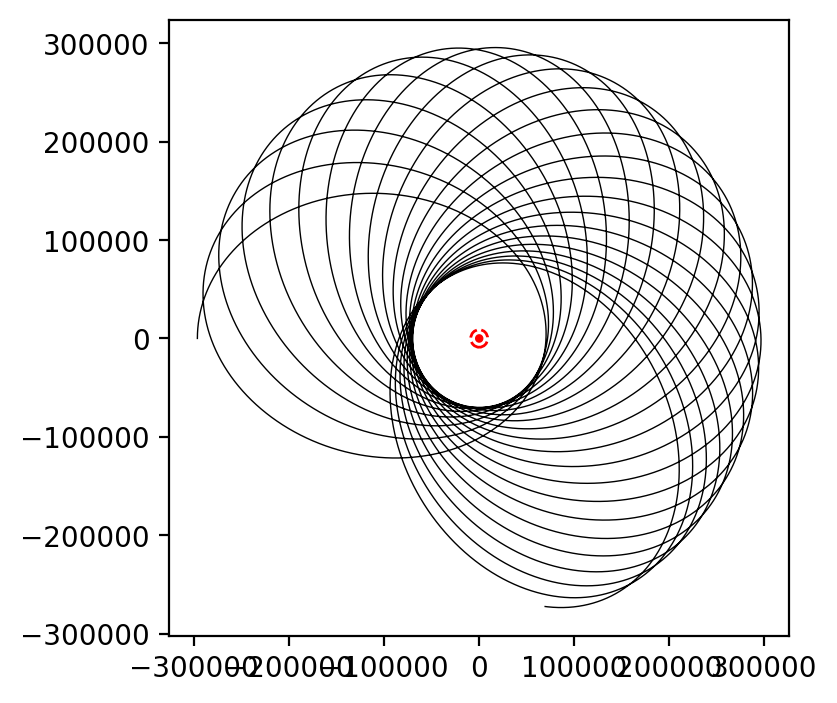

In [127]:
# test = particle('stable',np.pi,20,1)
# pos = test.travel(1e7)
# test = particle('unstable',np.pi,20,1)
# pos = test.travel(1e6)
test = particle(100,np.pi,20,1)
pos = test.travel(1e6)

In [78]:
J = 8.95*10**38 / (3.285*10**23) / 2996 / 3e8
J

3031.2698344960536

In [105]:
4627/test.r_s

1.560832083958021